<a href="https://colab.research.google.com/github/1nakatan/hello-world/blob/master/%E5%88%9D%E6%9C%9F%E5%80%A4%E3%81%82%E3%82%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#python-control で制御系のシミュレーション！
!pip install slycot
!pip install control

     |████████████████████████████████| 1.5MB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.3.5-cp36-cp36m-linux_x86_64.whl size=1388757 sha256=0a7b84b660b24a016b95a7b9f9393e5370c03ed2254d9516f5b2c466bb941c06
  Stored in directory: /root/.cache/pip/wheels/44/a0/1a/2357a505e49314f194d8de50d5ce0a87b368b323ce70b34d16
Successfully built slycot
     |████████████████████████████████| 184kB 2.8MB/s 
  Created wheel for control: filename=control-0.8.2-py2.py3-none-any.whl size=192241 sha256=4a0d34839cc790a10b292aea8e47ff648069a72320055b07a3c5da95c0f731c3
  Stored in directory: /root/.cache/pip/wheels/62/70/b3/4ff8c0348172e6b1fa8c9c2f1388e80d3e86f15f27d63c2e23
Successfully built control


$
\begin{eqnarray}
\dot{\boldsymbol{x}}&=&\boldsymbol{Ax}(t)+\boldsymbol{b}u(t)\\
y&=&\boldsymbol{cx}(t)+du(t)
\end{eqnarray}
$

$A=\left [\begin{array}{c}
0&1\\
-6&-5
\end{array}\right]$,
$\boldsymbol{b}=\begin{bmatrix}
0\\
1
\end{bmatrix}$,
$\boldsymbol{c}=\begin{bmatrix}
1&0
\end{bmatrix}$,
$d=0$

$\boldsymbol{x}(t)=\begin{bmatrix}
1\\0
\end{bmatrix}$
のときの応答を示す．

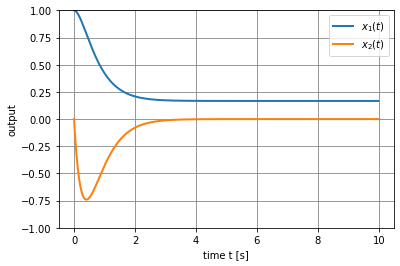

In [3]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

#システムの定義
A = [[0, 1],[-6, -5]]
b = [[0],[1]]
c = [[1, 0],[0,1]]  #状態を出力するために単位行列を利用
d = [[0],[0]]       #状態を出力するため

#初期値
x0 = [[1],[0]]

#ステップ応答を評価
sys = ss(A, b, c, d)    #状態空間表現
t = np.arange(0,10,0.01) #時刻0から10s まで　0.01 s 刻み
y,T = step(sys,t,x0)

#表示
plt.plot(T,y[:,0],label='$x_1(t)$', lw=2)  #x1
plt.plot(T,y[:,1],label='$x_2(t)$', lw=2)  #x2
plt.grid(color='gray')
plt.xlabel('time t [s]')
plt.ylabel('output')
plt.ylim([-1, 1])
plt.legend()
plt.show()

上記のシステムで，
$A=\begin{bmatrix}
0&1\\
6&-1
\end{bmatrix}$に変更すると，正の極が存在し，ステップ応答は以下のようになる．

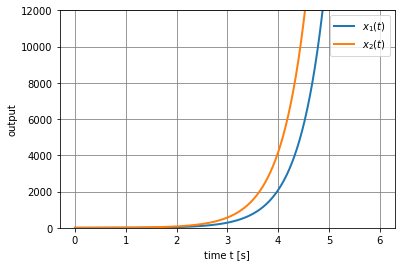

In [5]:
#システムの定義
A = [[0, 1],[6, -1]]

#ステップ応答を評価
sys = ss(A, b, c, d)    #状態空間表現
t = np.arange(0,6,0.01) #時刻0から10s まで　0.01 s 刻み
y,T = step(sys,t,x0)

#表示
plt.plot(T,y[:,0],label='$x_1(t)$', lw=2)  #x1
plt.plot(T,y[:,1],label='$x_2(t)$', lw=2)  #x2
plt.grid(color='gray')
plt.xlabel('time t [s]')
plt.ylabel('output')
plt.ylim([0, 12000])
plt.legend()
plt.show()

また，

$A=\begin{bmatrix}
0&1\\
-5&-2
\end{bmatrix}$に変更すると，極が複素数となり，ステップ応答は以下のようになる．

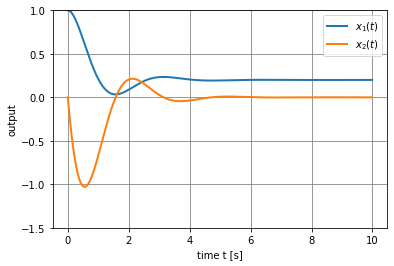

In [7]:
#システムの定義
A = [[0, 1],[-5, -2]]

#ステップ応答を評価
sys = ss(A, b, c, d)    #状態空間表現
t = np.arange(0,10,0.01) #時刻0から10s まで　0.01 s 刻み
y,T = step(sys,t,x0)

#表示
plt.plot(T,y[:,0],label='$x_1(t)$', lw=2)  #x1
plt.plot(T,y[:,1],label='$x_2(t)$', lw=2)  #x2
plt.grid(color='gray')
plt.xlabel('time t [s]')
plt.ylabel('output')
plt.ylim([-1.5, 1])
plt.legend()
plt.show()